In [1]:
# Step 1: Data Cleaning & Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Step 1: Load Dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
print("Initial shape:", df.shape)


Initial shape: (23055, 41)


In [3]:

# Step 2: Convert Date column
df['Date'] = pd.to_datetime(df['Date'])


In [4]:

# Step 3: Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)


In [5]:

# Step 4: Select only important numeric columns for outlier removal
key_cols = ['Open', 'High', 'Low', 'Close', 'Volume']


In [6]:

# Step 5: Apply Z-score filtering only on those columns
z_scores = np.abs(stats.zscore(df[key_cols]))
df = df[(z_scores < 3).all(axis=1)]
print("After Z-score removal on key columns:", df.shape)


After Z-score removal on key columns: (21686, 41)


In [7]:

# Step 6: Apply IQR on same key columns to remove extreme outliers
Q1 = df[key_cols].quantile(0.25)
Q3 = df[key_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[key_cols] < (Q1 - 1.5 * IQR)) | (df[key_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After IQR filtering on key columns:", df.shape)


After IQR filtering on key columns: (18185, 41)


In [8]:

# Step 7: Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'


In [9]:

# Step 8: Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values


In [10]:

# Step 9: Train-Test Split (time-aware)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"✅ Training: {X_train.shape}, Testing: {X_test.shape}")


✅ Training: (14548, 4), Testing: (3637, 4)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load the dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Clean numeric financial columns with commas or bad formats
financial_columns = ['Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity', 'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA', 'Trailing Twelve Months (TTM) Earnings']

for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Fill remaining missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# 1. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print("📊 Descriptive Statistics:\n", desc_stats)

📊 Descriptive Statistics:
                                                Mean        Median  \
Open                                   9.364766e+01  3.858500e+01   
High                                   9.486310e+01  3.898300e+01   
Low                                    9.242093e+01  3.829750e+01   
Close                                  9.367227e+01  3.859850e+01   
Adj Close                              9.320657e+01  3.805078e+01   
Volume                                 1.384445e+08  5.576380e+07   
Market Cap                             1.912023e+12  2.000000e+12   
PE Ratio                               3.591245e+01  3.578995e+01   
Beta                                   1.152678e+00  1.147000e+00   
EPS                                    1.029935e+01  6.970000e+00   
Forward PE                             2.823359e+01  3.143583e+01   
Revenue                                         NaN           NaN   
Gross Profit                                    NaN           NaN   
Operati

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Clean numeric financial columns with commas or missing values
financial_columns = [
    'Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity',
    'Trailing Twelve Months (TTM) Revenue', 'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
]

# Convert financial columns to numeric (remove commas)
for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Drop columns with 100% missing values
df.drop(columns=[
    'Revenue',
    'Gross Profit',
    'Operating Income',
    'Total Assets',
    'Total Equity',
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
], inplace=True)

# Fill remaining numeric NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# 1. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print("📊 Descriptive Statistics:\n", desc_stats)

📊 Descriptive Statistics:
                                   Mean        Median       Std Dev  \
Open                      9.364766e+01  3.858500e+01  1.260602e+02   
High                      9.486310e+01  3.898300e+01  1.277498e+02   
Low                       9.242093e+01  3.829750e+01  1.243307e+02   
Close                     9.367227e+01  3.859850e+01  1.260690e+02   
Adj Close                 9.320657e+01  3.805078e+01  1.261236e+02   
Volume                    1.384445e+08  5.576380e+07  2.430001e+08   
Market Cap                1.912023e+12  2.000000e+12  1.084576e+12   
PE Ratio                  3.591245e+01  3.578995e+01  8.300362e+00   
Beta                      1.152678e+00  1.147000e+00  7.078544e-02   
EPS                       1.029935e+01  6.970000e+00  6.071170e+00   
Forward PE                2.823359e+01  3.143583e+01  5.725820e+00   
Net Income                5.924319e+10  5.143400e+10  3.460809e+10   
Debt to Equity            6.779647e+01  6.675600e+01  5.019640e

In [13]:
# Drop any remaining columns with >95% nulls (or specifically)
df.drop(columns=['Cash Ratio'], inplace=True, errors='ignore')


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])


In [15]:

# -------------------------------
# 2. Clean Financial Columns
# -------------------------------
financial_columns = [
    'Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity',
    'Trailing Twelve Months (TTM) Revenue', 'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
]

for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')


In [16]:

# -------------------------------
# 3. Drop Fully-Null or Unusable Columns
# -------------------------------
df.drop(columns=[
    'Revenue',
    'Gross Profit',
    'Operating Income',
    'Total Assets',
    'Total Equity',
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings',
    'Cash Ratio'  # still NaN
], inplace=True, errors='ignore')


In [17]:

# -------------------------------
# 4. Handle Remaining Missing Values
# -------------------------------
df.fillna(df.median(numeric_only=True), inplace=True)


In [18]:

# -------------------------------
# 5. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print("📊 Descriptive Statistics:\n", desc_stats)


📊 Descriptive Statistics:
                                   Mean        Median       Std Dev  \
Open                      9.364766e+01  3.858500e+01  1.260602e+02   
High                      9.486310e+01  3.898300e+01  1.277498e+02   
Low                       9.242093e+01  3.829750e+01  1.243307e+02   
Close                     9.367227e+01  3.859850e+01  1.260690e+02   
Adj Close                 9.320657e+01  3.805078e+01  1.261236e+02   
Volume                    1.384445e+08  5.576380e+07  2.430001e+08   
Market Cap                1.912023e+12  2.000000e+12  1.084576e+12   
PE Ratio                  3.591245e+01  3.578995e+01  8.300362e+00   
Beta                      1.152678e+00  1.147000e+00  7.078544e-02   
EPS                       1.029935e+01  6.970000e+00  6.071170e+00   
Forward PE                2.823359e+01  3.143583e+01  5.725820e+00   
Net Income                5.924319e+10  5.143400e+10  3.460809e+10   
Debt to Equity            6.779647e+01  6.675600e+01  5.019640e

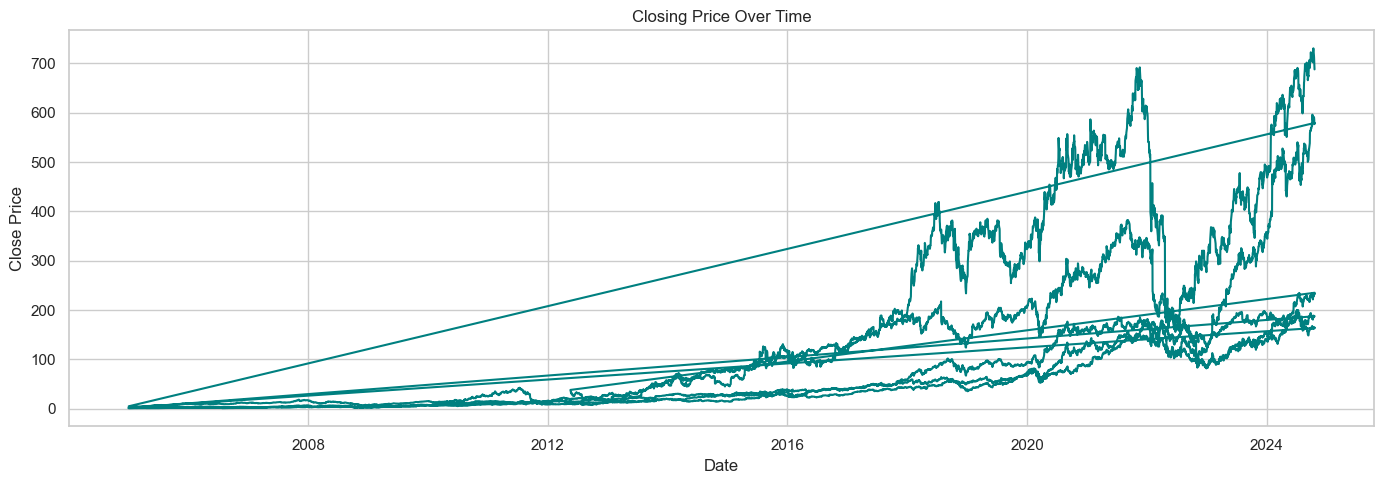

In [19]:

# -------------------------------
# 6. Visualizations
# -------------------------------

# Line Chart: Close Price Over Time
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Close'], color='teal')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


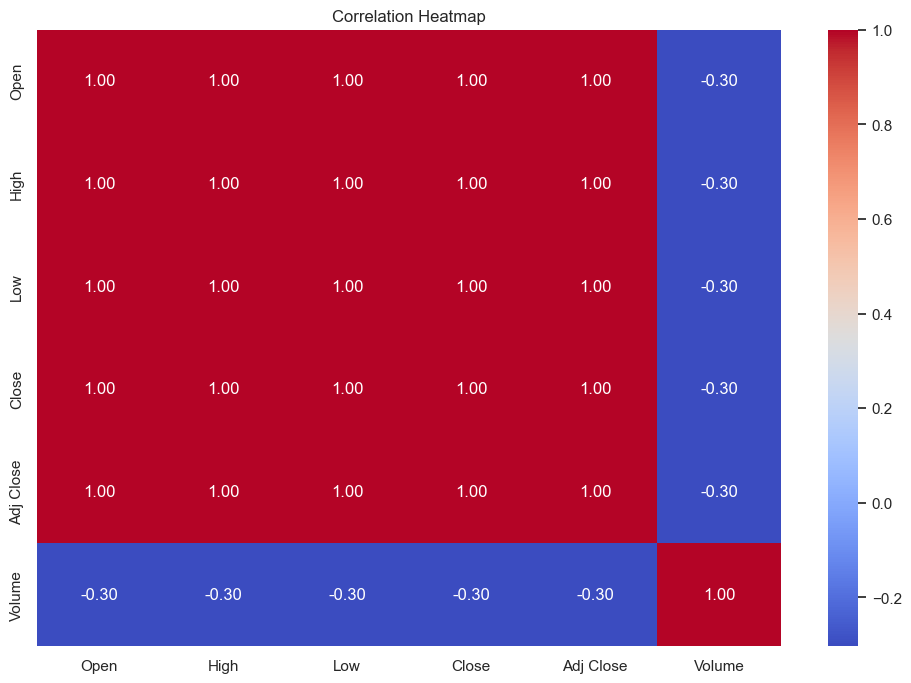

In [20]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
heatmap_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sns.heatmap(df[heatmap_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


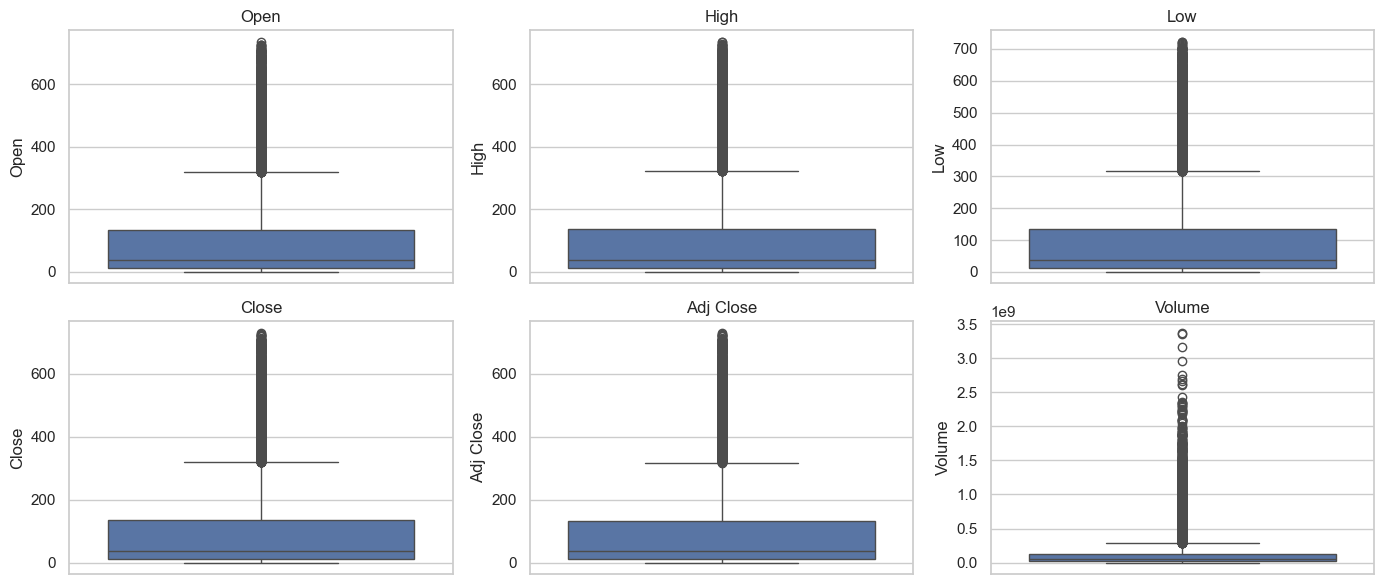

In [21]:

# Box Plots (outlier detection)
plt.figure(figsize=(14, 6))
for i, col in enumerate(heatmap_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


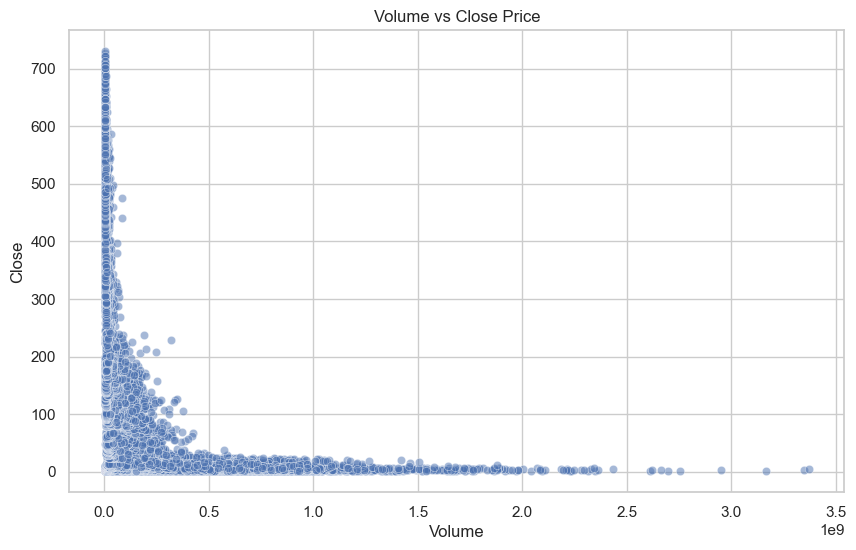

In [22]:

# Scatter Plot: Volume vs Close
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.5)
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.grid(True)
plt.show()


In [23]:

# Feature Correlation with Close
correlation_with_close = df.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print(" Features correlated with Close price:\n", correlation_with_close)

# -------------------------------
# 7. Feature Selection and Scaling
# -------------------------------
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values


 Features correlated with Close price:
 Close                       1.000000
Adj Close                   0.999979
Low                         0.999889
High                        0.999887
Open                        0.999755
EPS                         0.456703
Target Price                0.455472
Quarterly Revenue Growth    0.348651
Annual Dividend Rate        0.292597
Dividends Paid              0.292597
Operating Margin            0.206725
Profit Margin               0.148618
Current Ratio               0.145539
Quick Ratio                 0.132600
Beta (5Y)                   0.117510
Beta                        0.117510
PE Ratio                    0.077131
Forward PE                  0.064582
Debt to Equity             -0.101080
Price to Book Ratio        -0.125743
Return on Equity (ROE)     -0.145868
Total Debt                 -0.275056
Dividend Yield             -0.298932
Volume                     -0.300832
Net Income                 -0.338542
Enterprise Value           -0.35161

In [24]:

# -------------------------------
# 8. Train-Test Split (Time-aware)
# -------------------------------
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"✅ X_train: {X_train.shape}, X_test: {X_test.shape}")


✅ X_train: (18444, 4), X_test: (4611, 4)


In [25]:
#3. Model Development

In [26]:
#1. Imports & Setup
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [27]:
# 2. Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [28]:
# 3. Train and Evaluate Models
print("📊 Basic Evaluation of Models\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"📈 {name}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R²: {r2_score(y_test, preds):.2f}")
    print("-" * 40)


📊 Basic Evaluation of Models

📈 Linear Regression
MAE: 1.22
RMSE: 2.29
R²: 1.00
----------------------------------------
📈 Decision Tree
MAE: 4.56
RMSE: 15.35
R²: 0.99
----------------------------------------
📈 Random Forest
MAE: 4.25
RMSE: 15.19
R²: 0.99
----------------------------------------
📈 Gradient Boosting
MAE: 4.81
RMSE: 15.93
R²: 0.99
----------------------------------------


In [29]:
# 4. Cross-Validation for Each Model
print("\n🔁 Cross-Validation Scores (5-fold RMSE):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"✅ {name}: RMSE = {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")


🔁 Cross-Validation Scores (5-fold RMSE):

✅ Linear Regression: RMSE = 0.69 ± 0.38
✅ Decision Tree: RMSE = 6.57 ± 11.08
✅ Random Forest: RMSE = 6.31 ± 11.18
✅ Gradient Boosting: RMSE = 6.67 ± 11.06


In [30]:
# 5. Hyperparameter Tuning for Random Forest
print("\n Running Grid Search for Random Forest...\n")
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


 Running Grid Search for Random Forest...



In [31]:
# 6. Evaluate the Tuned Random Forest Model
preds = best_rf.predict(X_test)
print("🎯 Best Random Forest After Grid Search:")
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
print(f"R²: {r2_score(y_test, preds):.2f}")
print(f"🔍 Best Parameters: {grid_search.best_params_}")

🎯 Best Random Forest After Grid Search:
MAE: 4.26
RMSE: 15.16
R²: 0.99
🔍 Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [32]:
#4.MLflow Integration

In [36]:
# ✅ MLflow Training & Logging Script (mlflow_train.py)
# ---------------------------

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# ✅ Set up MLflow tracking directory
tracking_dir = "C:/Users/DELL/Desktop/Guvi/mlflow_logs"
mlflow.set_tracking_uri(f"file:///{tracking_dir.replace(os.sep, '/')}")
mlflow.set_experiment("FAANG_Stock_Regression")

# ✅ Load and preprocess dataset
df = pd.read_csv("C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(df.median(numeric_only=True), inplace=True)

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

best_model = None
best_model_name = ""
best_rmse = float("inf")

# ✅ Train and log models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        mlflow.log_param("model_name", name)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        input_example = X_test[:2]
        signature = infer_signature(X_test, preds)
        mlflow.sklearn.log_model(
            model,
            artifact_path="model",
            input_example=input_example,
            signature=signature
        )

        print(f"✅ {name} logged | RMSE: {rmse:.2f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_model_name = name

# ✅ Log best model in a new run
with mlflow.start_run(run_name="Best_Model") as run:
    mlflow.log_param("model_name", f"Best_Model: {best_model_name}")
    mlflow.sklearn.log_model(
        best_model,
        artifact_path="best_model",
        input_example=X_test[:2],
        signature=infer_signature(X_test, best_model.predict(X_test))
    )
    print(f"🏆 Best model saved as 'best_model' | Run ID: {run.info.run_id}")

# Save test data for Streamlit app
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

✅ Linear Regression logged | RMSE: 2.29
✅ Decision Tree logged | RMSE: 15.35
✅ Random Forest logged | RMSE: 15.19
✅ Gradient Boosting logged | RMSE: 15.93
🏆 Best model saved as 'best_model' | Run ID: ae654c391d02487e9e9e295a241534b3
